In [1]:
import pylidc as pl
import pandas as pd
import matplotlib.pyplot as plt

## Extrair dados das anotações dos médicos
extrai e guarda no ficheiro "pylidc_features.csv"

In [2]:
# formato para o dataframe
df_pylidc = pd.DataFrame(columns= [
                            'case_id',
                            'slice_thickness','pixel_spacing',
                            'subtlety','internalStructure','calcification','sphericity','margin','lobulation','spiculation','texture',
                            'diameter','surface_area','volume',
                            'malignancy',
                            ])


# receber e analisar as anotacoes
ann = pl.query(pl.Annotation).all()
for i in range(len(ann)):
    att  = dict((col, "") for col in df_pylidc.columns)

    # ids para identificar o nodulo expecifico
    att['case_id'] = f"{ann[i].scan.patient_id}_{ann[i].scan.id}_{ann[i].id}"
    # att['patient_id'] = ann[i].scan.patient_id
    # att['annotation_id'] = ann[i].id  
    # att['scan_id'] = ann[i].scan.id

    # features
    st = pl.query(pl.Scan.slice_thickness).filter(pl.Scan.id == ann[i].scan.id)
    s = str(st[0])
    att['slice_thickness'] = float(s[1:4])
    ps = pl.query(pl.Scan.pixel_spacing).filter(pl.Scan.id == ann[i].scan.id)
    p = str(ps[0])
    att['pixel_spacing'] = float(p[1:5])

    att['subtlety'] = ann[i].subtlety
    att['internalStructure'] = ann[i].internalStructure 
    att['calcification'] = ann[i].calcification 
    att['sphericity'] = ann[i].sphericity
    att['margin'] = ann[i].margin  
    att['lobulation'] = ann[i].lobulation
    att['spiculation'] = ann[i].spiculation 
    att['texture'] = ann[i].texture

    att['diameter'] = ann[i].diameter
    att['surface_area'] = ann[i].surface_area
    att['volume'] = ann[i].volume

    # target
    att['malignancy'] = ann[i].malignancy  

    df_pylidc.loc[len(df_pylidc)] = att

#ordenar o dataset pelo patient_id (paciente 0001 no topo)
df_pylidc.sort_values(by=["case_id"], inplace=True)
df_pylidc.to_csv('pylidc_features.csv', sep=',', index=False)

In [3]:
# read csv
df_pylidc = pd.read_csv('pylidc_features.csv')
print(f'shape: {df_pylidc.shape}')

df_pylidc.head()

shape: (6859, 15)


,case_id,slice_thickness,pixel_spacing,subtlety,internalStructure,calcification,sphericity,margin,lobulation,spiculation,texture,diameter,surface_area,volume,malignancy
0,LIDC-IDRI-0001_12_84,2.5,0.70,5,1,6,3,3,3,4,5,32.205888,2801.428431,7869.369507,5
1,LIDC-IDRI-0001_12_85,2.5,0.70,5,1,6,4,4,5,5,5,33.188692,2198.454852,6146.438599,5
2,LIDC-IDRI-0001_12_86,2.5,0.70,5,1,6,3,2,3,3,5,31.959332,2392.704188,6594.474792,5
3,LIDC-IDRI-0001_12_87,2.5,0.70,5,1,6,5,4,1,5,4,33.669337,2573.278820,7348.411560,4
4,LIDC-IDRI-0002_13_88,1.2,0.68,2,1,6,5,1,1,1,1,30.023172,2880.758652,6576.900681,5


Loading dicom files ... This may take a moment.


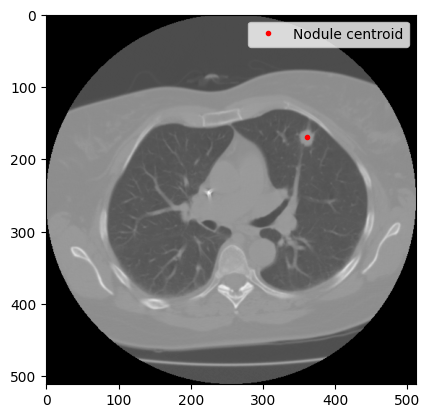

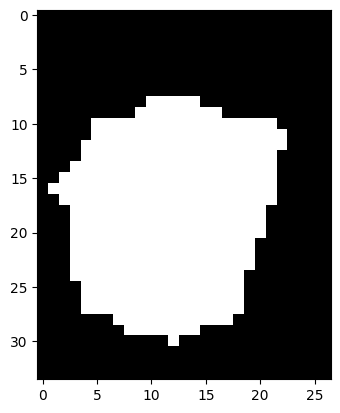

In [19]:
# codigo para visualizar a anotacao sobre o nodulo e a mask

ann = pl.query(pl.Annotation).first()
vol = ann.scan.to_volume()

i,j,k = ann.centroid

plt.imshow(vol[:,:,int(k)], cmap=plt.cm.gray)
plt.plot(j, i, '.r', label="Nodule centroid")
plt.legend()
plt.show()


mask = ann.boolean_mask()
bbox = ann.bbox()

plt.imshow(mask[:,:,3], cmap='gray')
plt.show()